Привет, меня зовут Артем Носенко и я буду проверять твой проект.
<br>Небольшая вступительная часть и начнем работу)
<br> Если не против, то предлагаю общаться на «ты». Если это не удобно - дай знать, и мы перейдем на "вы". Моя основная цель — не указать на совершенные ошибки, а поделиться своим опытом и помочь сделать твой проект лучше. Для этого я буду использовать разный стиль оформления комментариев.
<div class="alert alert-block alert-success">
✔️ Все хорошо.
</div>

<div class="alert alert-warning">
⚠️ Критических замечаний нет, но есть возможность сделать твою работу лучше.
</div>

<div class="alert alert-block alert-danger">
❌ Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>


Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> <br>
Артем, привет! <br> 
Спасибо за ревью <br>
Постарался учесть боьшинство твоих замечаний    
</div>

In [1]:
import re
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

import torch
import torch.nn as nn

import matplotlib.pyplot as plt
from matplotlib.patches import Patch 

<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
✔️ Отлично. Все необходимые библиотеки импортированы.
</div>

In [2]:
np.random.seed(499)
torch.use_deterministic_algorithms(True)
torch.manual_seed(499)
rmse = lambda target,pred: mean_squared_error(target,pred,squared=False)

<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
    
✔️ `SEED` зафиксирован. Отлично!
</div>

## Загрузка данных

In [3]:
df = pd.read_csv('/datasets/6_class.csv',index_col=0)
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 13.1+ KB


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


<s>Удалим ненужную колонку с номером строки,</s> остальным присвоим более короткике и удобные имена

In [4]:
df.columns = ['tem','lum','rad','mag','type','color']
df.head()

,tem,lum,rad,mag,type,color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


<b>Комментарий от ревьюера v1</b>

<div class="alert alert-warning">
    
⚠️ У метода `read_csv` есть атрибут `index_col`, который в данном случае удобно установить равным 0.\
Тогда не придется удалять лишнюю колонку. Пример кода ниже:
</div>

```python
pd.read_csv('/datasets/6_class.csv', index_col=0)
```

## Предобработка и анализ данных

Проверим неопределенные значения и убедимся что их нет 

In [5]:
df.isna().sum()

tem      0
lum      0
rad      0
mag      0
type     0
color    0
dtype: int64

Для использвания в нейронной сети все входные данные должны быть числовыми .   
Светимость, радиус и величина являются нормальными числовыми колонками и нуждаются только в масштабировании.  


In [6]:
df.color.value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Yellowish White         3
Blue white              3
white                   3
Orange                  2
yellowish               2
Whitish                 2
Blue white              1
Orange-Red              1
Blue                    1
Pale yellow orange      1
White-Yellow            1
Blue-White              1
Yellowish               1
Name: color, dtype: int64

Цвет звезды может быть одним из 5 цветов (Red/Blue/Yellow/Orange/White) или комбинацией двух цветов.  
Перед преобразованием надо привести название цвета к стандартным наименованиям каждого цвета. Так как названия базовых цветов начинаются с разных букв можно урезать слова до первой буквы в нижнем регистре и упорядочить буквы в получившейся  строке - это даст все возможные классы

In [7]:
df.type.value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: type, dtype: int64

Колонка "класс звезды" фактически является категориальной , причем по каждой каждому классу отобрано одинаковое количесто объектов

### Преобразования цвета 

Хотя одно-двухбуквенные названимя цветов можно закодировать непосредственно в OneHotEncoder, при этом потеряется инофрмация о близости смешанных цветов к каждому из компонентов. Поэтому мне кажется более правильным кодировать в одтельную колонку пять базовых цветов, а для смешанных цветов   выводить их сочетания в соответствующих колонках 

In [8]:
color_chars= ['b','o','r','w','y']
def enc_color(colorname):
    colors = re.findall(r'\b(\w)' ,colorname.lower())      # first letters of base color names  
    colors = [ re.sub('p','w',c) for c in colors ]         # to catch  only case where 'pale' apparently means 'white'
    return ( { c: int(c in colors) for c in color_chars })

df_color = pd.DataFrame.from_records( df.color.apply(enc_color) ,index = df.index)
df_color.tail(60 )

,b,o,r,w,y
180,0,0,1,0,0
181,0,0,1,0,0
182,0,0,1,0,0
183,0,0,1,0,0
184,0,0,1,0,0
185,0,0,1,0,0
186,0,0,1,0,0
187,0,0,1,0,0
188,0,0,1,0,0
189,0,0,1,0,0


<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
    
✔️ Преобразование корректное, хорошо.
</div>

### Преобразования типа

In [9]:
ohe = OneHotEncoder(sparse=False,drop='first')
df_type = pd.DataFrame( ohe.fit_transform(df[['type']]) )

### Проверка числовых колонок

Перед преобразованием колонок проверим наличие выбросов

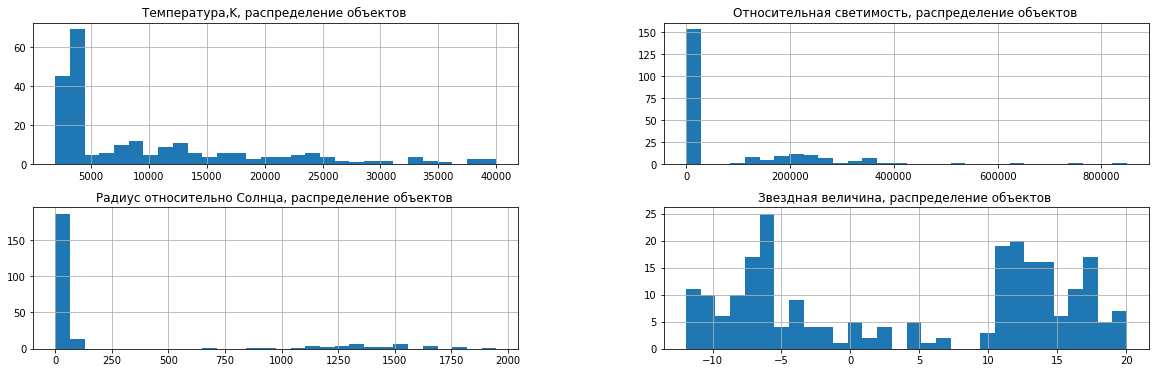

In [10]:
num_features = ['lum','rad','mag']
num_cols = ['tem'] + num_features
axes = df[num_cols].hist(figsize=(20,6),bins=30).flatten();
for ax,title in zip(axes,['Температура,K','Относительная светимость','Радиус относительно Cолнцa','Звездная величина']):
    ax.set_title( title+', распределение объектов ') 

<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
    
✔️ Распределения признаков отрисованы. Выводы верные.
</div>

<div class="alert alert-warning">
        
⚠️ Здесь и в дальнейшем, для улучшения читабельности графиков оси стоит подписывать. Это позволит улучшить восприятие графиков 
    и сделает твои выводы более наглядными для других.
</div>

<b>Комментарий от ревьюера v2</b>

<div class="alert alert-block alert-success">
    
✔️ Отлично!
</div>

Колонка звездной величины выглядит довольно естественно, по остальным вроде бы  есть выбросы, но можно убедиться что это специфическая зависимость от класса звезды 

In [11]:
df[df.lum>60_000].type.value_counts()

4    40
5    40
3     6
Name: type, dtype: int64

Верхнмй хвост по светимости состоит из звезд 4и 5го классов и их распределение естественно 

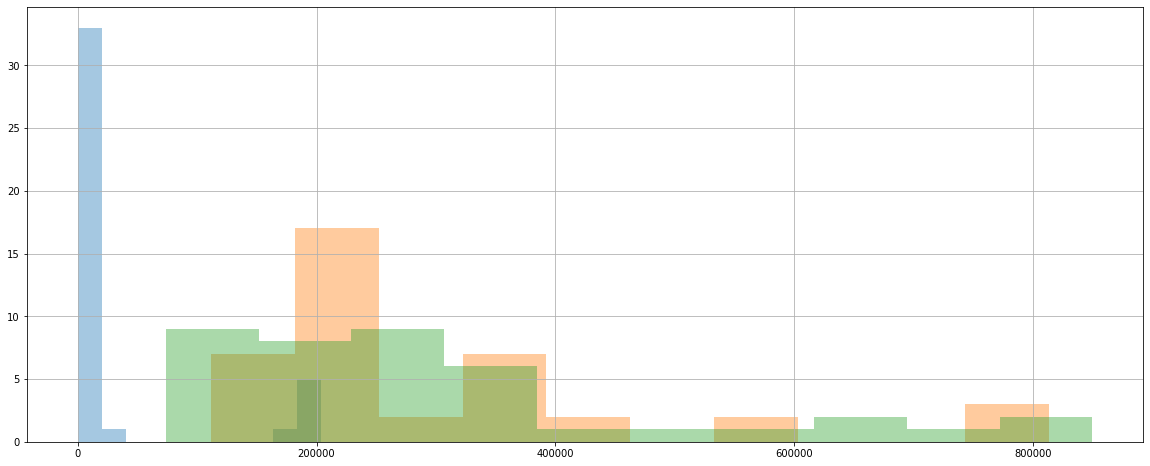

In [12]:
for ty in range(3,6):
    df.lum[df.type==ty].hist(figsize=(20,8),alpha = .4);

Некоторые сомнения вызывают 6 звезд главной последовательности в районе 200К, но нужно уточнять у астрофизиков, возможно ли это 

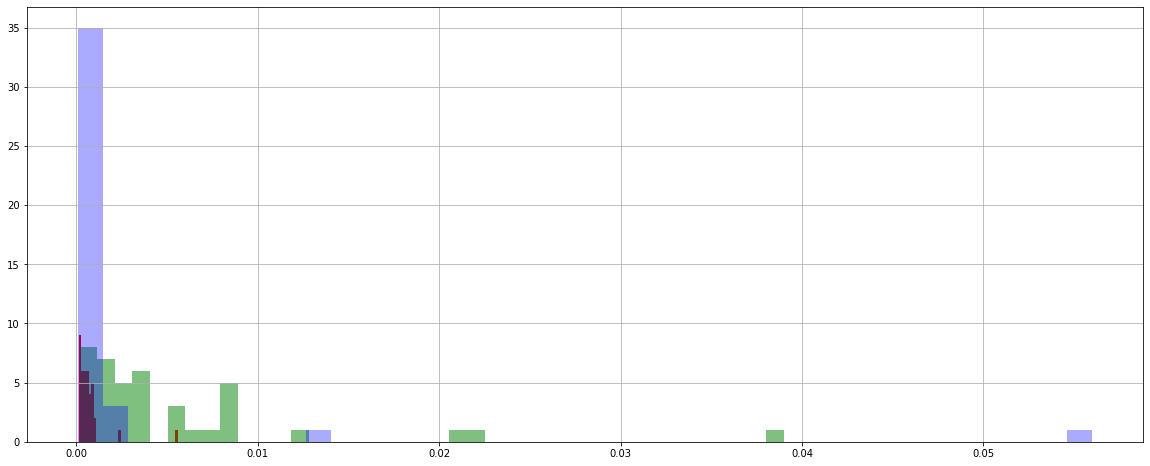

In [13]:
for ty in range(3):
    df.lum[df.type==ty].hist(bins=40, figsize=(20,8),alpha = 1/(ty+1) ,color = 'rgb'[ty])

У карликов распредеение светимости тоже выглядит естествнно, хотя масштаб существенно различается 

In [14]:
df[df.rad>400].type.value_counts()

5    40
Name: type, dtype: int64

Весь верхний хвост по радиусу состоит из звездв 5го класса и только из них

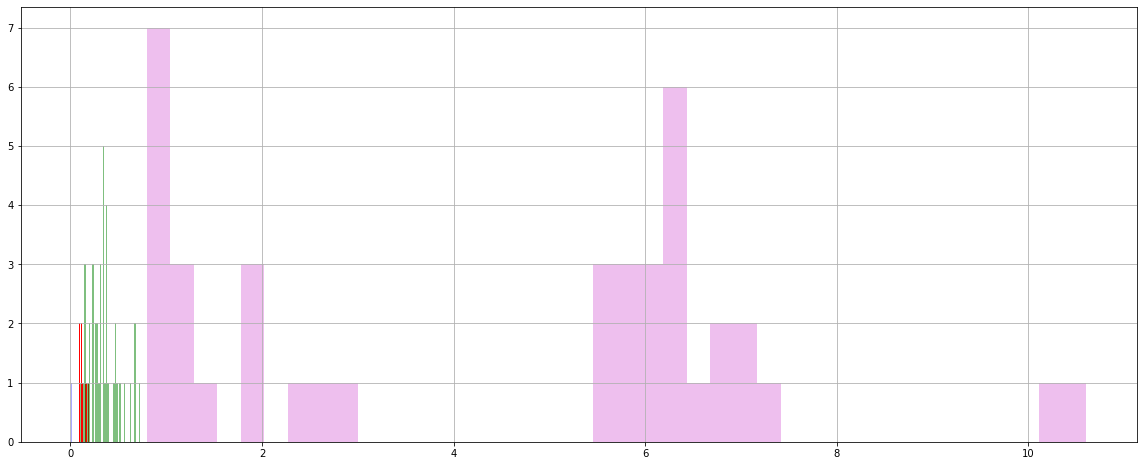

In [15]:
for ty in range(4):
    df.rad[df.type==ty].hist(bins=40, figsize=(20,8),alpha = 1/(ty+1) ,color = 'rgbm'[ty])

В целом , можно сказать , что числовые характеристики очень сильно зависят от класса звезда, переход к следующему классу может вызвать изменение на порядок. Некоторые гистограммы вызвают впоросы. Но вряд ли можно менять данные или выбрасывать  объекты без консультаций со специалистами.

<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
    
✔️ Хорошо, произведена стандартизация данных. Так нужно делать для улучшения сходимости нейронных сетей.
</div>

<div class="alert alert-warning">
    
⚠️ Стандартизацию стоит делать после разбиения на `train` и `test`. Подбирать параметры стандартизации необходимо на `train`, а применять на `test`. Это поможет избежать утечки информации из train выборки.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> <br>
Перенес ниже , после разделения наборов
</div>

### Корреляция признаков

In [16]:
df.corr()

,tem,lum,rad,mag,type
tem,1.000000,0.393404,0.064216,-0.420261,0.411129
lum,0.393404,1.000000,0.526516,-0.692619,0.676845
rad,0.064216,0.526516,1.000000,-0.608728,0.660975
mag,-0.420261,-0.692619,-0.608728,1.000000,-0.955276
type,0.411129,0.676845,0.660975,-0.955276,1.000000


Есть сильная антикорреляция между величиной и класс звезды. Но так как класс - это фактически категориальная переменная и я ожидаю , что нейросеть будет проводить оценку "внутри" класса, я принял решение оставить как есть .  
В конце концов, мы не может выкинуть класс из модели,он слишком важен.
Возможно , следует провести отдельное масштабирование дял каждого класса и посмотреть , улучшит ли оно результат

### Train- test split

Создадим для работы новый датафрейм из преобразованных колонок

In [17]:
X = pd.concat([df[num_features],df_color,df_type], axis=1)
y = df[['tem']]

И разобьем на тренировочный и тестовый наборы.  
Так как класс звезды играет огромную роль в модели (фактически рабивает её на несколько независимых) , я считаю , что разбиение дожно быть стратифицировано именно по классу.

In [18]:
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size = .25, shuffle=True, stratify = df.type)
i_tr = y_tr.index
i_te = y_te.index

#### Масштабирование

In [19]:
X_tr = X_tr.copy()
X_te = X_te.copy()

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> <br>
Здесь пришлось явно скопировать фреймы , чтобы избежать <i>SettingWithCopyWarning<i>
</div>

In [20]:
scl = StandardScaler()
scl.fit(X_tr[num_features])
X_tr[num_features] = scl.transform(X_tr[ num_features] )
X_te[num_features] = scl.transform(X_te[ num_features] )

## Построение базовой нейронной сети

In [21]:
X_tr = torch.FloatTensor(X_tr.values)
X_te = torch.FloatTensor(X_te.values)
y_tr = torch.FloatTensor(y_tr.values)
y_te = torch.FloatTensor(y_te.values)

Нам нужно рассчитать числовую величину, пожтому в качестве метрики выбрана r2, а в качестве функции потерь - MSELoss
Для скорости обучения и инициализации весов взяты типичные значения  из упражнений  

<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
    
✔️ Функция потерь выбрана верно. Отлично!
</div>

<div class="alert alert-block alert-danger">
❌ В качестве ключевой метрики по условию необходимо выбрать метрику RMSE.По ней мы будем выбирать лучшее решение.
    
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> <br>
Вообще я не ожидал большого расхождения в оптимальных гиперпараметрах между RMSE и R2 <br> 
Поэтому подбирал по R2(где качество сразу понятно)   и только в конце посчитал RMSE <br>
Но после перехода на RMSE оптимальная точка существенно изменилась
</div>

<b>Комментарий от ревьюера v2</b>

<div class="alert alert-block alert-success">
    
✔️ Метрики R2 и RMSE схожи, но все-таки могут иметь оптимальные значения для разных моделей. Все верно!
</div>

In [22]:
n_in_neurons = len(X.columns)
n_hidden_neurons_1 = 10
n_hidden_neurons_2 = 5
n_out_neurons = 1 

net = nn.Sequential(
    nn.Linear(n_in_neurons,n_hidden_neurons_1),
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_2, n_out_neurons)#, 
)

def init_weights(layer):
    if type(layer) == nn.Linear: 
        nn.init.kaiming_uniform_(layer.weight, mode='fan_in', nonlinearity='relu') 
net.apply(init_weights)        

optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

loss = nn.MSELoss()

In [23]:
num_epochs = 100

for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    preds = net.forward(X_tr) 
       
    loss_value = loss(preds, y_tr)
    loss_value.backward()
            
    optimizer.step()
    
    if epoch % 10 == 0:
        net.eval()
        with torch.no_grad():
            test_preds = net.forward(X_te)
            r2 = r2_score(y_te.numpy(),test_preds.detach().numpy() )
            print(r2)

-1.3110980943190746
-1.311055642078074
-1.3110095937934756
-1.3109657247380624
-1.3109223482507684
-1.310873965596667
-1.3108213635656263
-1.3107643347303575
-1.3107047962160703
-1.3106441482047595


<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
    
✔️ Базовая модель реализована, так держать.
</div>

<div class="alert alert-warning">
        
⚠️ В момент валидации (`model.eval`) данных стоит отключать вычиления градиентов (`torch.no_grad()`).
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> <br>
Добавил, время сократилось на 30% 
</div>

:( Сеть вообще не обучилась , попробуем увеличить скорость и продлить обучение 

In [24]:
n_in_neurons = len(X.columns)
n_hidden_neurons_1 = 10
n_hidden_neurons_2 = 5
n_out_neurons = 1 

net1 = nn.Sequential(
    nn.Linear(n_in_neurons,n_hidden_neurons_1),
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_2, n_out_neurons)#, 
)

def init_weights(layer):
    if type(layer) == nn.Linear: 
        nn.init.kaiming_uniform_(layer.weight, mode='fan_in', nonlinearity='relu') 
net1.apply(init_weights)        

optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)    # increase learnig rate  10 times

loss = nn.MSELoss()

In [25]:
num_epochs = 1000             # increase num_epochs 10 times
for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    preds = net.forward(X_tr) 
       
    loss_value = loss(preds, y_tr)
    loss_value.backward()
            
    optimizer.step()
    
    if epoch % 100 == 0:
        net1.eval()
        test_preds = net.forward(X_te)
        r2 = r2_score(y_te.numpy(),test_preds.detach().numpy() )
        print(r2)

-1.310537017554195
-1.236895067659494
-0.7139109019464103
0.0880966660489948
0.4991187858371051
0.6098274553711115
0.6460001422542316
0.6697206306982317
0.6884933338869353
0.7040197414052363


In [26]:
print( 'Финальная метрика',r2)

Финальная метрика 0.7040197414052363


Результат уже более-менее вменяемый, но 

### Сравним с линейной регрессией

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_tr,y_tr)
y_pr = model.predict(X_te)
r2_score(y_te,y_pr)

0.7645573981642865

Простая регрессия считает лучше, чем нейронная сеть :(

### Иллюстрация

Диаграмма, рекомендованная в задании (не совсем понял , какой должна быть, в таком формате она показывает только предсказания для тренировочного набора )

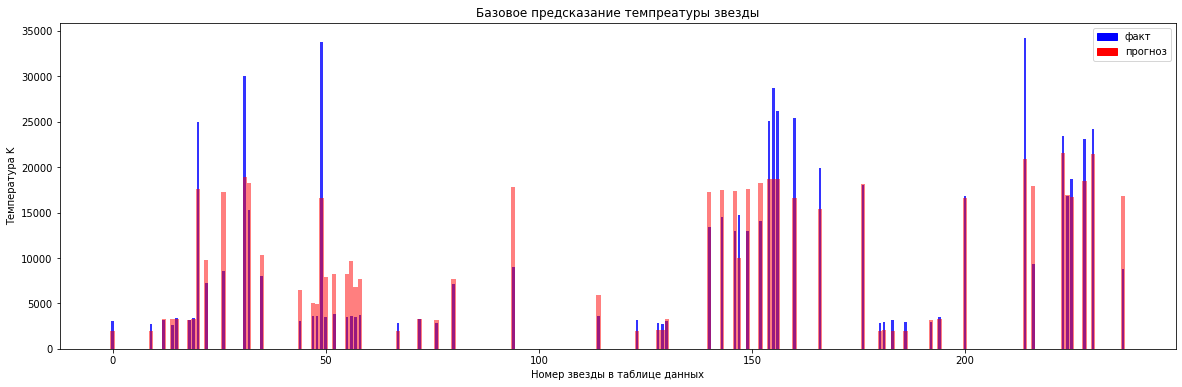

In [28]:
def plot_match_bar( d_te, title):
    fig, ax = plt.subplots(figsize=(20,6))
    ax.set_title('Базовое предсказание темпреатуры звезды')
    ax.set_xlabel('Номер звезды в таблице данных')
    ax.set_ylabel('Температура K')
    colors = { 'target':'blue','pred':'red'} 
    ax.bar(d_te.index,d_te.target,color='b',alpha =.8,width = .6);
    ax.bar(d_te.index,d_te.pred,color='r',alpha =.5,width=1);
    ax.legend(handles= [Patch(color='b', label='факт'),Patch(color='r', label='прогноз')] );

plot_match_bar( pd.DataFrame({'target': y_te.numpy().flatten(),'pred':test_preds.detach().numpy().flatten()},index= i_te)
               ,'Базовое предсказание температуры звезды')


Судя по картинке, нейросеть занижает температуру для горячих звезд  и завышает - для холодных 

## Улучшение нейронной сети

In [29]:
      
class Net(nn.Sequential):
    def __init__(self):
        super(Net, self).__init__() 



 Я решил , что для новой задачи проще написать свою тестовою решетку.  
 Во -первых создаем класс для прогона и записи результата одного обучения  

In [30]:
class Teacher:
    base_params = {
        'levels': [13,6,4,1],
        'weights':[0.5,0.1],
        'bias':[0.2,0.3],
        'acts':[nn.ReLU()] ,
        'fans':['fan_in'],
        'init_methods':[nn.init.kaiming_uniform_],
        'learn_rate':.1,
        'loss':nn.MSELoss(),
        'metric': rmse,
        'label':''
    }

    def __init__(self,params,random_state = 49999):
        print(f"---> Testing with params {params}")
        self.random_state = random_state
        params = self.base_params | params
        depth = len(params['levels'])
        arrange_array = lambda ar: (ar*int(depth/len(ar)))[:depth]
        self.levels = params['levels']
        self.activators = arrange_array(params['acts']) 
        self.fans = arrange_array(params['fans'])
        self.init_methods = arrange_array(params['init_methods'])    
        self.create_net()
        self.learn_rate = params['learn_rate']
        self.optimizer = torch.optim.Adam(self.net.parameters(), lr=self.learn_rate)
        self.loss = params['loss']
        self.epochs = params['epochs']
        self.eval_rate = params['eval_rate']
        self.eval_step =int(self.epochs*self.eval_rate)
        self.metric = params['metric']
        self.results = {}
        self.label = params['label']
        self.best = 10_000
        self.best_epoch=0
        self.final_metric =0 
        self.final_preds = []
 
        
    def create_net(self):
        torch.manual_seed(self.random_state)
        self.net = Net()
        for lev in range(len(self.levels)-1):
            ll = nn.Linear(self.levels[lev],self.levels[lev+1])
            self.init_methods[lev](ll.weight,mode=self.fans[lev] ,nonlinearity='relu')
            self.net.add_module('Linear_'+str(lev),ll)
            if lev < len(self.levels)-2:
                self.net.add_module('Activator_'+str(lev),self.activators[lev] )
        
     
    def run(self):   
        for epoch in range(self.epochs):
            self.optimizer.zero_grad()

            preds = self.net.forward(X_tr) 
            loss_value = self.loss(preds, y_tr)
            loss_value.backward()
            self.optimizer.step()
            
            if (epoch % self.eval_step == 0) or (epoch==self.epochs-1) :
                self.net.eval()
                with torch.no_grad():
                    test_preds = self.net.forward(X_te)
                    res = self.metric(y_te.numpy(),test_preds.detach().numpy() )
                    print(f"epoch {epoch},\tmetric {res:.4f}")
                    self.results[epoch] = res
                    if res < self.best:
                        self.best = res
                        self.best_epoch = epoch
            self.final_preds = test_preds
            self.final_metric = res
        print(f"best {self.best:.4f} \t (best epoch: {self.best_epoch} ) ---> ")

<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
    
✔️ Training loop реализован верно. Молодец.
</div>

<div class="alert alert-warning">
        
⚠️ Класс сложночитаемый, в него передается очень много параметров. Возможно стоит вынести часть кода в отделные классы.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> <br>
Согласен, но сходу исправить не получилось  <br> 
Так как с понедельника новый спринт, пока отправляю как есть  <br>
</div>

<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
    
✔️ Хорошо, принимаю так. Но на будущее код лучше разделять на несколько классов.
</div>

 И серию тестов с общим количеством эпох и оценочных этапов (eval_rate - доля оценочных этапов)

In [31]:
class TestSuit:
    def __init__(self,params_array,epochs={'epochs':100,'eval_rate':.1},random_state=49999):
        self.suit = params_array  
        self.epochs= epochs                # the same step for all tests  
        self.results = {}
        self.random_state = random_state
        

    def run(self):
        for params in self.suit:
            params=self.epochs|params                               
            t = Teacher(params,self.random_state)
            t.run()
            self.results[t.label] = t.results 

    def plot(self,ylim=(3500,7000),figsize=(20,8),styles=[*'rygbkm']):
        fig ,ax = plt.subplots( figsize=figsize )
        ax.set_ylim(ylim)
        styles.reverse()
        ax.set_xlabel('epochs passed')
        ax.set_ylabel('RMSE score')
        ticks = [ *range( int(1/self.epochs['eval_rate']) )]
        ticks_labels = [ *range(0,self.epochs['epochs'],int(self.epochs['eval_rate']*self.epochs['epochs']) )]
        ax.set_xticks(ticks)    
        ax.set_xticklabels(ticks_labels )    

        for (l,r)  in self.results.items():
            ax.plot( r.values() , styles.pop() ,label=l) 
        ax.legend() ; 



###  Предварительный тест для оценки конфигурации

На этой стадии поведем грубую оценку - определим количество слоев и эпох. на которых достигаются лучшие результаты   
Я не знаю, как лучше выбирать размеры слоев, поэтому обычно просто равномерно  снижаю их с 13 до 1   
Но для 4 слойной сети проверяется также 2х-кратное снижение на каждом слое (neg exponent)  

In [32]:
tests = [
    { 'levels': [13,5,1], 'label' : '3 layers uniform'},
    { 'levels': [13,8,4,1], 'label' : '4 layers uniform'},
    { 'levels': [13,6,3,1], 'label' : '4 layers negative exp sizes'} , 
    { 'levels': [13,10,7,4,1], 'label' : '5 layers uniform'},
    { 'levels': [13,11,9,7,5,3,1], 'label' : '7 layers uniform'},
    { 'levels': [*range(13,0,-1)], 'label' : '13 layers uniform' }  # 1..13
] 

На предварительном тестировании у меня появилось подозрезние, что random seed может сильно влиять на результат дя некоторых конфигураций, пожтому сначала проводим тестирование с одинаковыми параметрами и различными random_stateЮ чтобы проверить стабильность системы
Все тесты идут для 400 эпох с оценкой через 10 

---> Testing with params {'epochs': 400, 'eval_rate': 0.04, 'levels': [13, 5, 1], 'label': '3 layers uniform'}
epoch 0,	metric 14192.8486
epoch 16,	metric 14148.7607
epoch 32,	metric 14019.9814
epoch 48,	metric 13775.3379
epoch 64,	metric 13401.7676
epoch 80,	metric 12907.3408
epoch 96,	metric 12314.4014
epoch 112,	metric 11651.9268
epoch 128,	metric 10942.4570
epoch 144,	metric 10204.6504
epoch 160,	metric 9466.7480
epoch 176,	metric 8760.8232
epoch 192,	metric 8114.7554
epoch 208,	metric 7548.0503
epoch 224,	metric 7070.4414
epoch 240,	metric 6682.6567
epoch 256,	metric 6377.9927
epoch 272,	metric 6144.3364
epoch 288,	metric 5966.8721
epoch 304,	metric 5831.0581
epoch 320,	metric 5724.7588
epoch 336,	metric 5638.9707
epoch 352,	metric 5567.4639
epoch 368,	metric 5506.0366
epoch 384,	metric 5453.4468
epoch 399,	metric 5411.7231
best 5411.7231 	 (best epoch: 399 ) ---> 
---> Testing with params {'epochs': 400, 'eval_rate': 0.04, 'levels': [13, 8, 4, 1], 'label': '4 layers uniform'}
epo

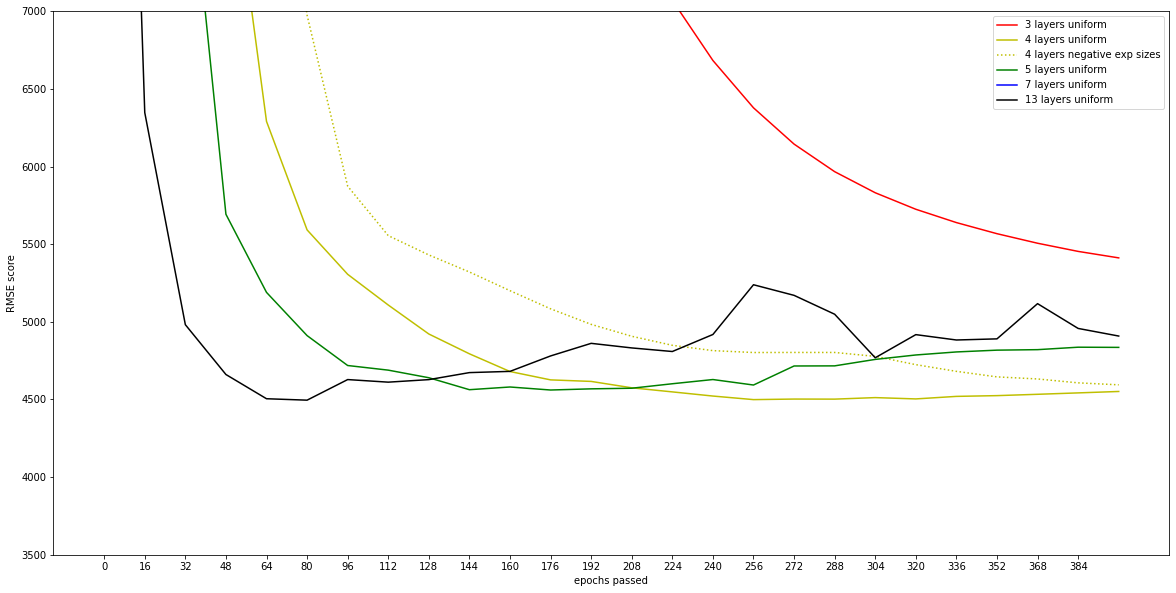

In [33]:
ts = TestSuit(tests,epochs={'epochs':400,'eval_rate':.04},random_state = 123456789)
ts.run() 
ts.plot(ylim=(3500,7000),figsize=(20,10), styles=['r', 'y', 'y:', 'g', 'b', 'k'] )

---> Testing with params {'epochs': 400, 'eval_rate': 0.04, 'levels': [13, 5, 1], 'label': '3 layers uniform'}
epoch 0,	metric 14193.3516
epoch 16,	metric 14157.0146
epoch 32,	metric 14056.2891
epoch 48,	metric 13869.9570
epoch 64,	metric 13576.6562
epoch 80,	metric 13147.1074
epoch 96,	metric 12581.8477
epoch 112,	metric 11906.8242
epoch 128,	metric 11158.9971
epoch 144,	metric 10374.0391
epoch 160,	metric 9584.0693
epoch 176,	metric 8824.0547
epoch 192,	metric 8132.1396
epoch 208,	metric 7529.5947
epoch 224,	metric 7032.5039
epoch 240,	metric 6644.1860
epoch 256,	metric 6349.4087
epoch 272,	metric 6131.7725
epoch 288,	metric 5969.3916
epoch 304,	metric 5837.8662
epoch 320,	metric 5732.0176
epoch 336,	metric 5647.7271
epoch 352,	metric 5578.2632
epoch 368,	metric 5517.9458
epoch 384,	metric 5464.0483
epoch 399,	metric 5418.2041
best 5418.2041 	 (best epoch: 399 ) ---> 
---> Testing with params {'epochs': 400, 'eval_rate': 0.04, 'levels': [13, 8, 4, 1], 'label': '4 layers uniform'}
epo

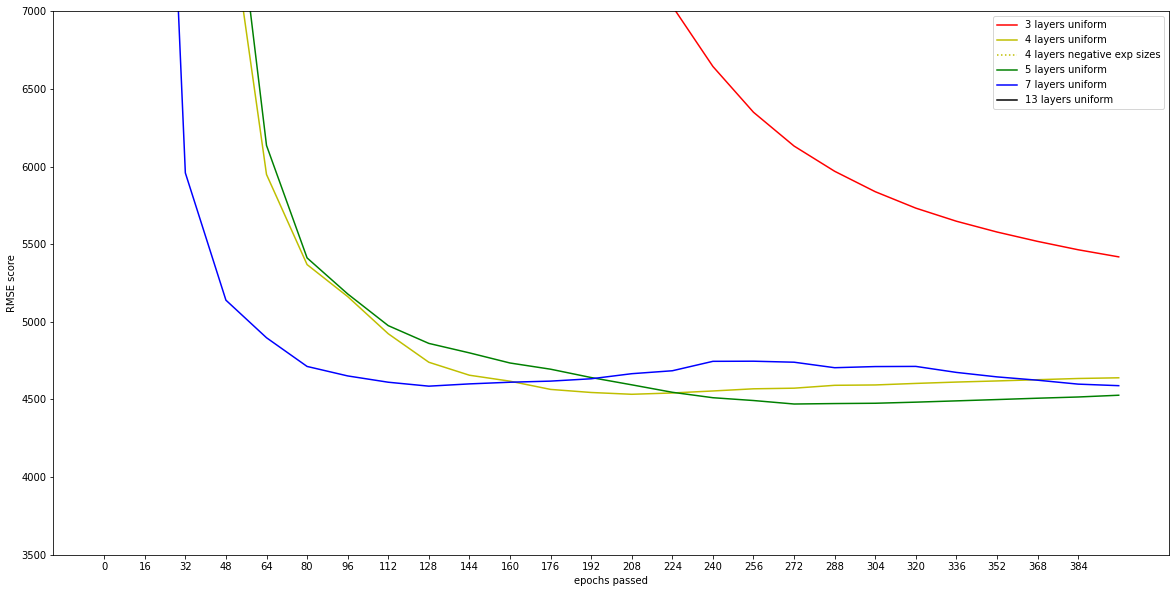

In [34]:
ts = TestSuit(tests,epochs={'epochs':400,'eval_rate':.04},random_state = 49999)
ts.run() 
ts.plot(ylim=(3500,7000),figsize=(20,10), styles=['r', 'y', 'y:', 'g', 'b', 'k'] )

---> Testing with params {'epochs': 400, 'eval_rate': 0.04, 'levels': [13, 5, 1], 'label': '3 layers uniform'}
epoch 0,	metric 14192.6816
epoch 16,	metric 14155.6865
epoch 32,	metric 14055.1846
epoch 48,	metric 13870.4238
epoch 64,	metric 13591.2852
epoch 80,	metric 13219.6963
epoch 96,	metric 12767.1699
epoch 112,	metric 12250.7666
epoch 128,	metric 11685.8789
epoch 144,	metric 11081.6689
epoch 160,	metric 10450.7783
epoch 176,	metric 9813.3506
epoch 192,	metric 9189.6055
epoch 208,	metric 8597.9434
epoch 224,	metric 8054.0864
epoch 240,	metric 7569.4521
epoch 256,	metric 7150.3022
epoch 272,	metric 6797.8257
epoch 288,	metric 6508.7920
epoch 304,	metric 6276.5503
epoch 320,	metric 6092.3262
epoch 336,	metric 5946.6782
epoch 352,	metric 5830.7661
epoch 368,	metric 5737.1489
epoch 384,	metric 5660.0269
epoch 399,	metric 5598.8604
best 5598.8604 	 (best epoch: 399 ) ---> 
---> Testing with params {'epochs': 400, 'eval_rate': 0.04, 'levels': [13, 8, 4, 1], 'label': '4 layers uniform'}
ep

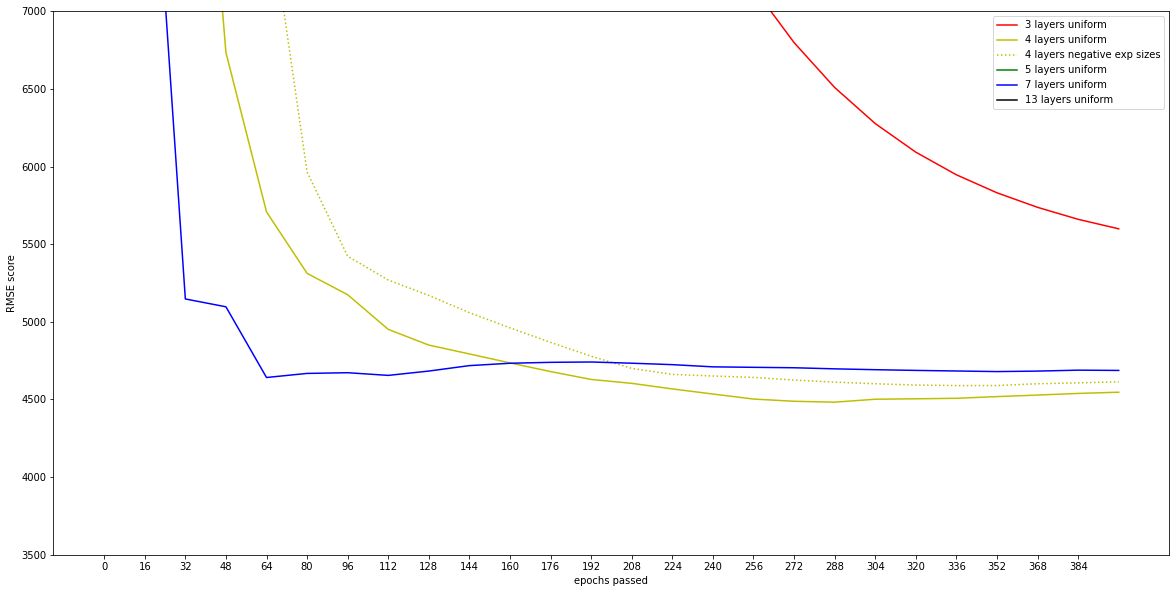

In [35]:
ts = TestSuit(tests,epochs={'epochs':400,'eval_rate':.04},random_state=35673567)
ts.run() 
ts.plot(ylim=(3500,7_000),figsize=(20,10), styles=['r', 'y', 'y:', 'g', 'b', 'k'] )

В общем, можно сделать вывод, что чем больше слоев в сети, тем менее она стабильна. 
При некоторых  стартовых счетчиках сети 5+ слоев (зеленый, синий, черный  графики) вообще не смогли начать реальное обучение за 400 эпох, оставшись с r2 < -1. Хотя , если  рубеж -1 преодолен, дляних можно ожидать быстрое обучение.
Трёхслойная сеть самая тупая. но и самая стабильная.  
Все же, я считаю настолько нестабильные модели (срыв в одном случае из 3х) непригодными  
Для дальнейшего тестирования остаются сети на 3-5 слоев с равномерным убыванием нейронов

Прогоним длинный тест , чтобы посмотреть , что происходит при большом увеличении количество эпох (10_000 эпох через 200)

In [36]:
%time
tests = [
    { 'levels': [13,5,1], 'label' : '3 layers uniform'},
    { 'levels': [13,8,4,1], 'label' : '4 layers uniform'},
    { 'levels': [13,10,7,4,1], 'label' : '5 layers uniform'}
]
ts = TestSuit(tests,epochs={'epochs':10_000,'eval_rate':.02})
ts.run()  

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs
---> Testing with params {'epochs': 10000, 'eval_rate': 0.02, 'levels': [13, 5, 1], 'label': '3 layers uniform'}
epoch 0,	metric 14193.3516
epoch 200,	metric 7818.5527
epoch 400,	metric 5415.2710
epoch 600,	metric 4982.1260
epoch 800,	metric 4797.5483
epoch 1000,	metric 4770.8979
epoch 1200,	metric 4689.4111
epoch 1400,	metric 4675.7495
epoch 1600,	metric 4607.7402
epoch 1800,	metric 4585.1504
epoch 2000,	metric 4588.3828
epoch 2200,	metric 4609.4438
epoch 2400,	metric 4629.7817
epoch 2600,	metric 4654.4160
epoch 2800,	metric 4662.3613
epoch 3000,	metric 4681.1465
epoch 3200,	metric 4692.2471
epoch 3400,	metric 4698.1787
epoch 3600,	metric 4712.5391
epoch 3800,	metric 4721.3604
epoch 4000,	metric 4724.2993
epoch 4200,	metric 4719.4556
epoch 4400,	metric 4720.1758
epoch 4600,	metric 4716.7832
epoch 4800,	metric 4712.6455
epoch 5000,	metric 4711.1323
epoch 5200,	metric 4711.6611
epoch 5400,	metric 4710.3403
epoch 5600,	metri

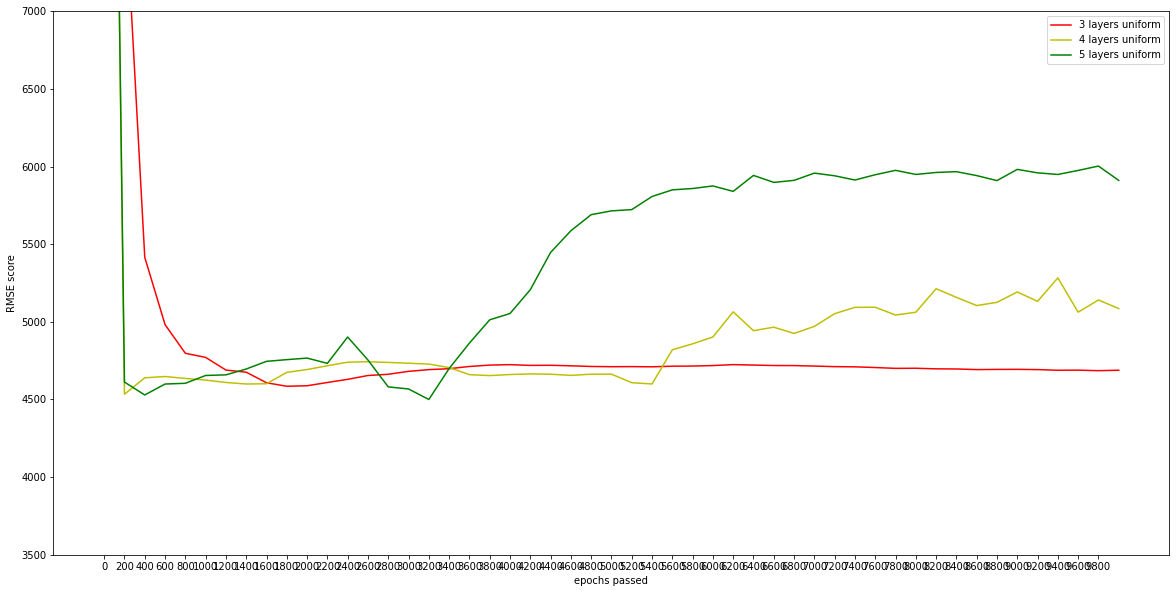

In [37]:
ts.plot(ylim=(3500,7000),figsize=(20,10), styles=['r', 'y', 'g'] )

Чем больше слоев , тем раньше начинается переобучение  
исходя из графиков , наиболее перспективна 4- слойная модель с 5000 эпох 

### Тест параметров инициализации

Затем проверим , насколько могут повлиять на резултат более тонкие параметры - скорость обучения и способ инициализации.   
(я предполагаю , что их влияние меньше, чем влияние макроструктуры сети)  
Следуюший класс прогоняет тесты на нескольких скоростях с 6 вариантами инициалзации на каждой:
нормальная / равномерная инициализация весов и для каждой 3 опции       
fan_in, fan_out, попеременно fan_in/fan_out на соседних слоях

In [38]:
class TestLearnRate:
    def __init__(self,learn_rates,params,epochs={'epochs':2600,'eval_rate':.2},random_state=55555):
        self.learn_rates = learn_rates  
        self.params= params
        self.epochs= epochs                # the same step for all tests  
        self.results = {}
        self.random_state = random_state
        

    def run(self):
        for methods in [[nn.init.kaiming_uniform_],[nn.init.kaiming_normal_]]:
            meth_names = list( map(lambda m: m.__name__[8:-1] ,methods) )
            for fan in [['fan_in'],['fan_out'],['fan_in','fan_out']]:
                label = '|'.join(meth_names)+'__'+'|'.join(fan) 
                serie = []
                for learn_rate  in self.learn_rates:            
                    params=self.epochs|self.params|{'learn_rate':learn_rate,'init_methods':methods,'fans':fan,'label':label}                               
                    t = Teacher(params,random_state=self.random_state)
                    t.run()
                    serie.append(t.best)
                self.results[label] = serie 

    def plot(self,ylim=(3500,7000),figsize=(20,8),styles=[*'rygbkm']):
        fig ,ax = plt.subplots( figsize=figsize )
        ax.set_ylim(ylim)
        styles.reverse()
        ax.set_title('Зависимость метрики R2 от скорости обучения при различных параметрах инициализации ')
        ax.set_xlabel('learn_rate')
        ax.set_ylabel('r2 score')
        ticks = self.learn_rates
        ax.set_xticks(ticks)    

        for (l,r)  in self.results.items():
            ax.plot( self.learn_rates,r , styles.pop() ,label=l) 
        ax.legend() ; 



Для каждой скорости прогоняется тест на полное количество эпох и оценивается финальный результат (~30 минут )

In [39]:
%%time
t4 = TestLearnRate([.01,.03,.06,.1,.15,.2,.27,.35],params={'levels': [13,9,5,1]},
                   epochs={'epochs':5000, 'eval_rate':.04}  ,random_state = 123456789 )
t4.run()

---> Testing with params {'epochs': 5000, 'eval_rate': 0.04, 'levels': [13, 9, 5, 1], 'learn_rate': 0.01, 'init_methods': [<function kaiming_uniform_ at 0x7fb0f3804af0>], 'fans': ['fan_in'], 'label': 'uniform__fan_in'}
epoch 0,	metric 14193.8174
epoch 200,	metric 11331.4414
epoch 400,	metric 5948.2339
epoch 600,	metric 5331.5737
epoch 800,	metric 5016.5059
epoch 1000,	metric 4825.3999
epoch 1200,	metric 4760.6816
epoch 1400,	metric 4665.7241
epoch 1600,	metric 4614.9800
epoch 1800,	metric 4582.4702
epoch 2000,	metric 4545.2329
epoch 2200,	metric 4551.9829
epoch 2400,	metric 4586.1108
epoch 2600,	metric 4653.7026
epoch 2800,	metric 4763.0210
epoch 3000,	metric 4759.5913
epoch 3200,	metric 4690.6025
epoch 3400,	metric 4600.3081
epoch 3600,	metric 4524.8511
epoch 3800,	metric 4466.2417
epoch 4000,	metric 4428.7666
epoch 4200,	metric 4401.6240
epoch 4400,	metric 4378.8960
epoch 4600,	metric 4353.3271
epoch 4800,	metric 4337.1401
epoch 4999,	metric 4322.9443
best 4322.9443 	 (best epoch: 49

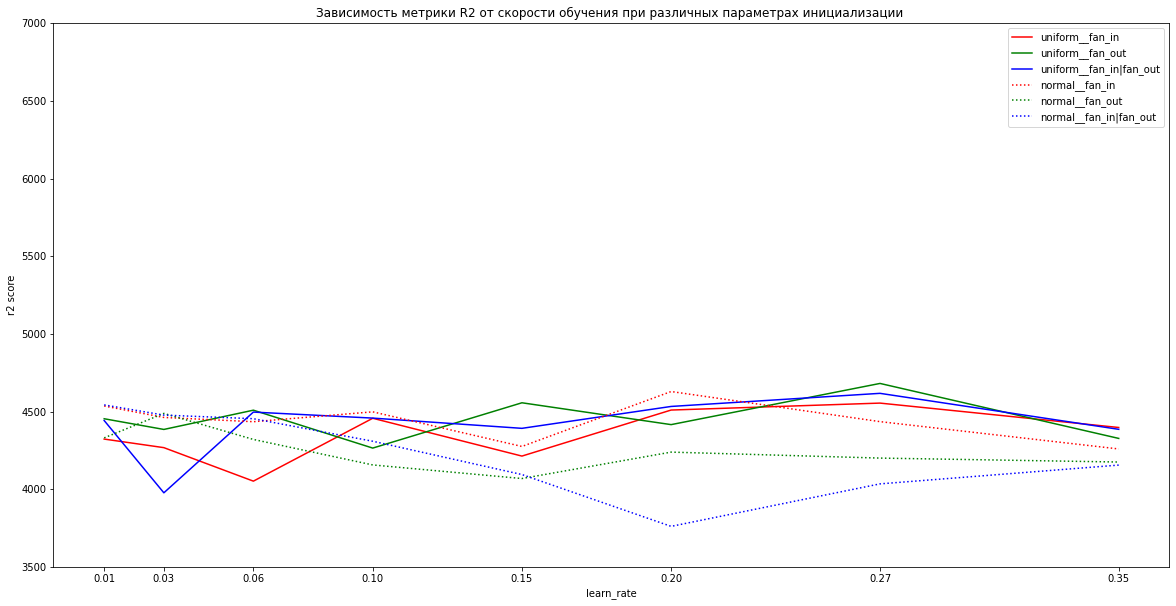

In [40]:
t4.plot(ylim=(3500,7000),figsize=(20,10), styles=['r', 'g', 'b', 'r:','g:','b:'])

Резльтаты близки и относительно мало зависят от параметров инициализации

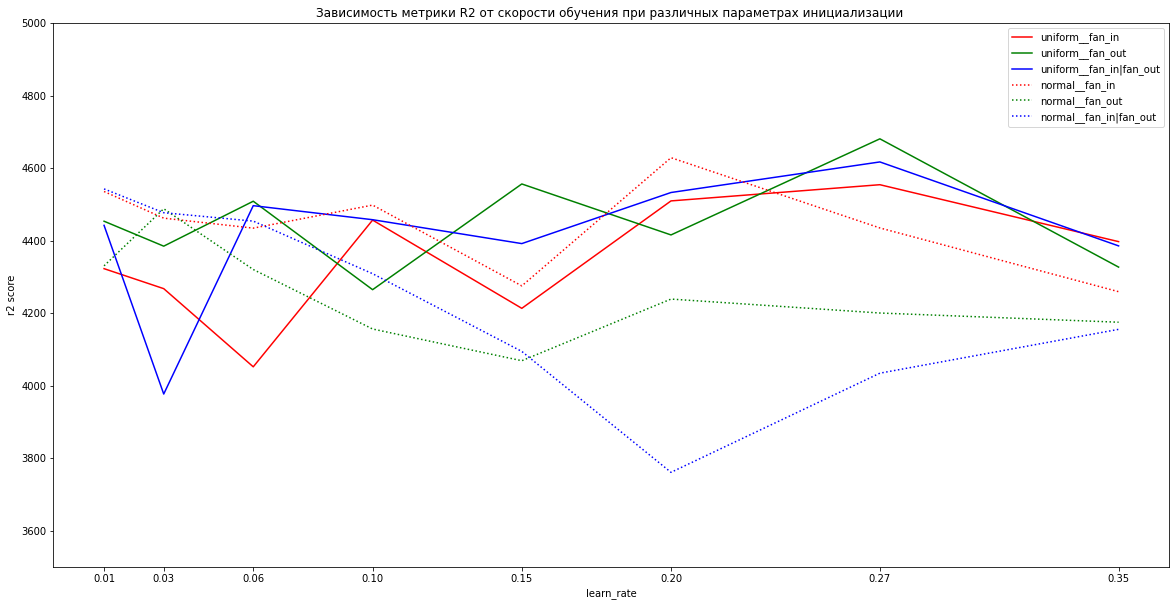

In [41]:
t4.plot(ylim=(3500,5000),figsize=(20,10), styles=['r', 'g', 'b', 'r:','g:','b:'])

Более близкий взгляд показывает колебания метрики в диапазоне 3700-4600 
Для финалного теста выбрана скорость .2  для линии  normal initialization, fan_in| fan_out 

### Финальный тест

In [42]:
params={'levels': [13,9,5,1], 
        'learn_rate':.2,
        'init_methods':[nn.init.kaiming_normal_],'fans':['fan_in','fan_out'],
        'epochs':3800, 'eval_rate':.04 
       }
t_final= Teacher( params,random_state=123456789 )
t_final.run()

---> Testing with params {'levels': [13, 9, 5, 1], 'learn_rate': 0.2, 'init_methods': [<function kaiming_normal_ at 0x7fb0f3804b80>], 'fans': ['fan_in', 'fan_out'], 'epochs': 3800, 'eval_rate': 0.04}
epoch 0,	metric 14185.5811
epoch 152,	metric 4678.9434
epoch 304,	metric 4725.8604
epoch 456,	metric 4711.1802
epoch 608,	metric 4681.0625
epoch 760,	metric 4677.9219
epoch 912,	metric 4698.0771
epoch 1064,	metric 4684.4082
epoch 1216,	metric 4639.8369
epoch 1368,	metric 4676.8276
epoch 1520,	metric 4731.8862
epoch 1672,	metric 4699.8540
epoch 1824,	metric 4691.5068
epoch 1976,	metric 4692.7847
epoch 2128,	metric 4935.5376
epoch 2280,	metric 4891.1172
epoch 2432,	metric 4821.0684
epoch 2584,	metric 4829.3228
epoch 2736,	metric 4843.4771
epoch 2888,	metric 4784.5093
epoch 3040,	metric 4804.4438
epoch 3192,	metric 4743.4478
epoch 3344,	metric 4154.9482
epoch 3496,	metric 4011.9758
epoch 3648,	metric 3768.8523
epoch 3799,	metric 3868.2329
best 3768.8523 	 (best epoch: 3648 ) ---> 


 Результат финального теста R2:0.8284, 	RMSE: 3868 


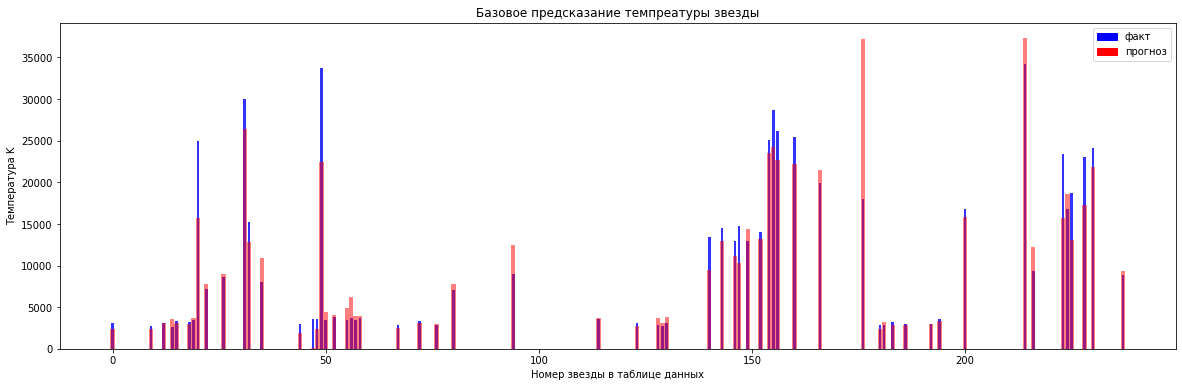

In [43]:
final_preds = t_final.final_preds.detach().numpy().flatten()
r2 = r2_score(y_te.numpy(),final_preds )
final_rmse = rmse(y_te.numpy(),final_preds )
print(f" Результат финального теста R2:{r2:.4f}, \tRMSE: {final_rmse:.0f} " )

plot_match_bar( pd.DataFrame({'target': y_te.numpy().flatten(),'pred':final_preds},index= i_te)
               ,'Базовое предсказание температуры звезды')

Картинка выглядит лучше, визуально ошибок для низкотепмературных звезд не видно, для высокотемпературных наблюдаются ошибки в обе стороны, более- менее сбалансированные  
Однако есть несколько объектов для которых прогноз  отличается от факта примерно вдвое 

## Выводы

* Для анализа использовался набор данны с 240 наблюдениями, 3мя числовыми и 2мя категориальными признаками
* Из них проверки модели использованы 60 наблюдений, стратифмцированных по классу звезды 
* По результатам исследования лучшей оказалась четрехслойная модель с количеством нейронов 13-9-5-1
* Эта модель позволяет предсказывать температуру звезды с ошибкой меньше 4000 по метрике RMSE 
* Для обучения модели требуется 3800 эпох при скорости обучения 0.2
* Модели без настройки гиперпараметров обычно предсказывают результат с метрикой r2=0.72-0.75, что хуже линейной регрессии 
* Возможно модели чувствительны к способу инициализации весов и даже к стартовому значению генератора случайных чисел; этот вопрос требует дополнительного исследования  

<b>Комментарий от ревьюера v1</b>


    
# Общий вывод

Спасибо за работу, у тебя получился хороший проект. Есть ряд замечаний, после устранения которых я готов буду принять твою работу:
</div>

<div class="alert alert-block alert-danger">
❌ В качестве ключевой метрики по условию необходимо выбрать метрику RMSE.По ней мы будем выбирать лучшее решение.
    
</div>

<div class="alert alert-warning">
 
⚠️ В выводы стоит добавить информацию о статистике выборки - количестве наблюдений, числе признаков (категориальных и числовых).
        
⚠️ Стандартизацию стоит делать после разбиения на `train` и `test`. Подбирать параметры стандартизации необходимо на `train`, а применять на `test`. Это поможет избежать утечки информации из train выборки.
        
⚠️ В момент валидации (`model.eval`) данных стоит отключать вычиления градиентов (`torch.no_grad()`).
</div>
    
</div>

<b>Комментарий от ревьюера v2</b>
<div class="alert alert-block alert-success">

    
# Общий вывод

✔️ Спасибо за работу, я ее принимаю. Удачи в учебе!
</div>